# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [2]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

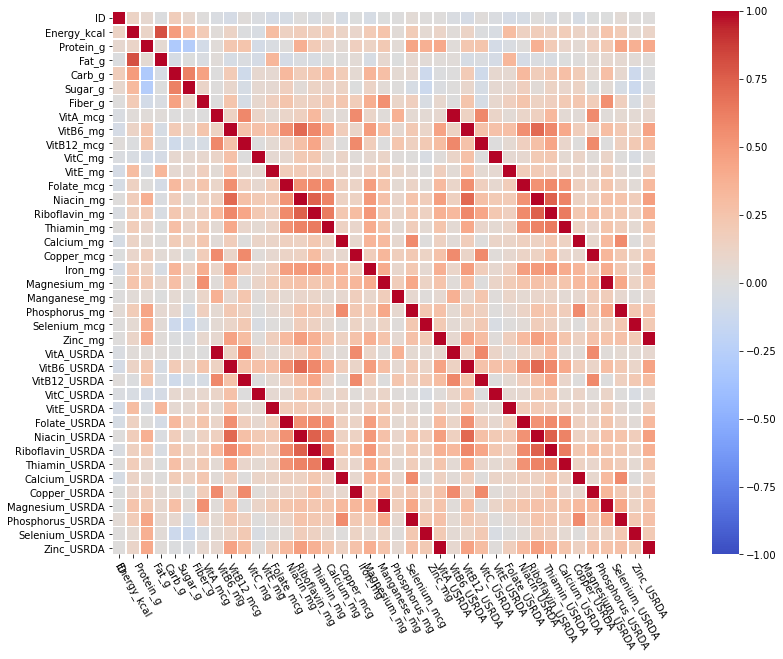

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),
           vmin = -1,
           vmax = 1,
           cmap=sns.color_palette("coolwarm", as_cmap=True),
           square = True,
           linewidths = 0.5)
           
plt.xticks(rotation=-60);

In [10]:
data = df.iloc[:, 0:-15]

### Variables no numércias
Elimina las variables de texto del dataset

In [11]:
data = data.iloc[:, 7:]

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables
Most of the variables are "zero" inflated and skewed right. We may want to consider transformation so "improve" the distributions and hopefully produce better correlations for our PCA. Note: this is an optional step that may not always improve results.

Podemos realizar una transformación Logarítmica

Nota: Como tenemos muchos ceros en nuestro df, podemos sumarle 1 para evitar este problema (indeterminación, infinito).

(df = df + 1)

In [16]:
data = data + 1
data.columns

Index(['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g',
       'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg', 'VitE_mg',
       'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Calcium_mg',
       'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg'],
      dtype='object')

In [17]:
data = np.log(data)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [18]:
scaler = StandardScaler()

scaler.fit(data)
data_scaled = scaler.transform(data)

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [19]:
data.shape

(8618, 23)

In [20]:
pca = PCA(n_components=23)
pca.fit(data_scaled)

X_pca = pca.transform(data_scaled)
print(X_pca.shape)
X_pca

(8618, 23)


array([[-2.13903189, -0.96801891, -1.46398817, ...,  0.18965049,
        -0.11318379, -0.9906675 ],
       [-2.1064854 , -0.90950144, -1.48058025, ...,  0.27098865,
        -0.10503073, -0.99697913],
       [-3.26782972, -1.13842955, -2.04233529, ..., -0.04375945,
        -0.02955105, -0.96973915],
       ...,
       [-2.93052905,  1.66440526, -1.24206984, ...,  0.48350769,
         0.59177161, -0.63639048],
       [ 1.11889546, -0.78083408,  0.80512618, ...,  0.65270747,
         0.98403199,  0.37786612],
       [ 0.37955124, -1.27668203,  1.59197004, ...,  0.34724908,
         0.3352501 , -0.52011023]])

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

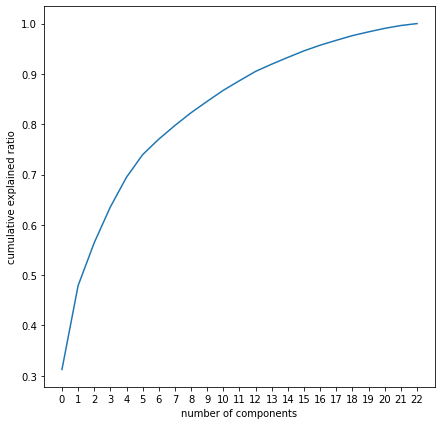

In [23]:
plt.figure(figsize=(7,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained ratio')
plt.xticks(np.arange(23));

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [25]:
pca6 = PCA(n_components=6)
pca6.fit(data_scaled)
X_pca6 = pca6.transform(data_scaled)

In [26]:
final = pd.DataFrame(X_pca6, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
final.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,-1.463985,0.270843,4.067015,0.306951
1,-2.106485,-0.909501,-1.480578,0.263216,4.032479,0.348374
2,-3.267830,-1.138430,-2.042330,1.175374,4.071773,1.326230
3,1.525964,-1.264102,0.136010,-0.929825,2.430395,-2.095213
4,1.240712,-1.204120,0.004730,-1.192037,2.691693,-2.342176


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [28]:
final2 = pd.merge(df[['FoodGroup', 'ShortDescrip', 'Descrip']], final, left_index=True, right_index=True)
final2.head()

,FoodGroup,ShortDescrip,Descrip,PC1,PC2,PC3,PC4,PC5,PC6
0,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",-2.139032,-0.968019,-1.463985,0.270843,4.067015,0.306951
1,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",-2.106485,-0.909501,-1.480578,0.263216,4.032479,0.348374
2,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",-3.267830,-1.138430,-2.042330,1.175374,4.071773,1.326230
3,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",1.525964,-1.264102,0.136010,-0.929825,2.430395,-2.095213
4,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",1.240712,-1.204120,0.004730,-1.192037,2.691693,-2.342176


In [30]:
for (columnName, columnData) in final2[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']].iteritems():
    final2.sort_values(by=columnName, ascending=False, inplace=True)
    print(columnName)
    print(final2['FoodGroup'].iloc[:5])
    print('\n')

PC1
1832    Breakfast Cereals
1863    Breakfast Cereals
2025    Breakfast Cereals
4454            Beverages
1850    Breakfast Cereals
Name: FoodGroup, dtype: object


PC2
4190                            Beverages
3577    Vegetables and Vegetable Products
3320    Vegetables and Vegetable Products
271                      Spices and Herbs
1863                    Breakfast Cereals
Name: FoodGroup, dtype: object


PC3
8537                        Beverages
4355                        Beverages
5277    Lamb, Veal, and Game Products
973                  Poultry Products
974                  Poultry Products
Name: FoodGroup, dtype: object


PC4
1850    Breakfast Cereals
1867    Breakfast Cereals
2025    Breakfast Cereals
7648               Snacks
2029    Breakfast Cereals
Name: FoodGroup, dtype: object


PC5
776    Fats and Oils
632    Fats and Oils
786    Fats and Oils
721    Fats and Oils
716    Fats and Oils
Name: FoodGroup, dtype: object


PC6
7457    Beef Products
7458    Beef Products
41